In [35]:
import numpy as np 
import IPython.display as ipd
import matplotlib.pyplot as plt


def create_sinusoid(amp, freq, duration, sample_rate):
    t = np.arange(0, duration, 1.0 / sample_rate)

    return amp * np.sin(2 * np.pi * freq * t)
    
# complete the function k_harmonics  
def k_harmonics(k, amp, freq, duration, sample_rate): 
    data = create_sinusoid(amp, freq, duration*k, sample_rate)

    for K in range(1, k):
        harmonic = create_sinusoid(amp/(1+K), freq*(1+K), duration*k, sample_rate)
        harmonic[:K*int(sample_rate*duration)] = 0
        #count the amount of zeros in the harmonic
        data += harmonic

    return data

# use the code in a notebook cell to plot/listen to the resulting 
# signal of the k_harmonics function 
f0 = 220
sr = 8000
amp = 0.5
duration = 1 
k = 5 

signal = k_harmonics(k, amp, f0, duration, sr)
#plt.plot(np.abs(signal))
ipd.Audio(signal, rate=sr)


440
8000
[ 0.          0.08596455  0.16936896 ... -0.46291484 -0.32872496
 -0.17064903]
660
16000
[ 0.          0.08596455  0.16936896 ... -0.62956095 -0.47218196
 -0.25322547]
880
24000
[ 0.          0.08596455  0.16936896 ... -0.73909928 -0.59496787
 -0.33290347]
1100
32000
[ 0.          0.08596455  0.16936896 ... -0.79134914 -0.6937367
 -0.40894407]


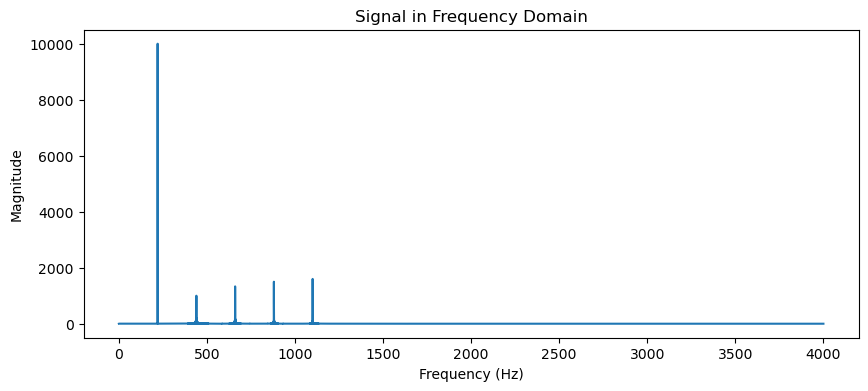

In [25]:
# Compute the FFT of the signal
fft = np.fft.fft(signal)

# Compute the frequencies associated with the FFT values
freqs = np.fft.fftfreq(len(fft), 1.0 / sr)

# Plot the absolute value of the FFT (to get the magnitude) in the frequency domain
plt.figure(figsize=(10, 4))
plt.plot(freqs[:len(freqs)//2], np.abs(fft)[:len(freqs)//2])  # Only plot up to the Nyquist frequency
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Signal in Frequency Domain')
plt.show()